GENDER: 0.3866017738490415
AGE: 0.03094646561729092
SMOKING: 0.13432418718677425
YELLOW_FINGERS: 0.03693454863070834
ANXIETY: -0.1082874236009818
PEER_PRESSURE: -0.05505003402818048
CHRONIC_DISEASE: 0.3853272239689904
FATIGUE: 0.45201149834681187
ALLERGY: 0.10828742360098152
WHEEZING: 0.33208983439618955
ALCOHOL_CONSUMING: 0.16083109857870675
COUGHING: 0.3060530708103969
SHORTNESS_OF_BREATH: 0.029749725747112665
SWALLOWING_DIFFICULTY: -0.30855942986085233
CHEST_PAIN: 0.1318178281363188
Intercept: -4.160078204539503


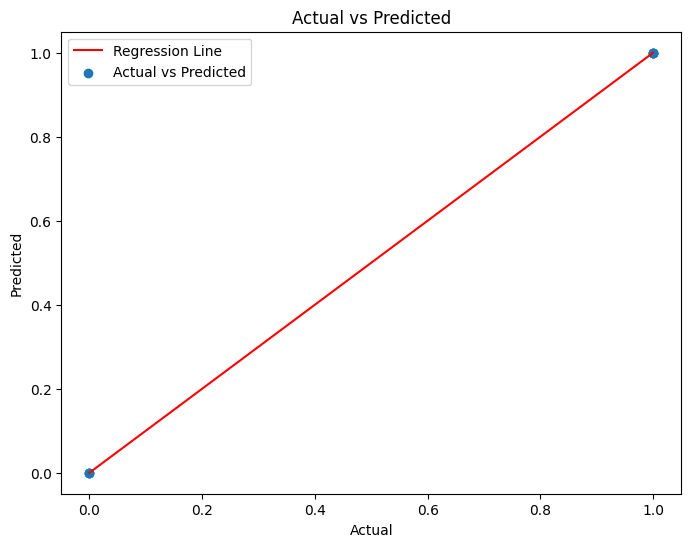

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset
data = {
    'GENDER': ['M', 'M', 'F', 'M', 'F', 'F', 'M'],
    'AGE': [69, 74, 59, 63, 63, 75, 52],
    'SMOKING': [1, 2, 1, 2, 1, 1, 2],
    'YELLOW_FINGERS': [2, 1, 1, 2, 1, 2, 1],
    'ANXIETY': [2, 1, 1, 2, 1, 1, 1],
    'PEER_PRESSURE': [1, 2, 2, 1, 1, 2, 1],
    'CHRONIC_DISEASE': [1, 2, 2, 1, 1, 2, 2],
    'FATIGUE': [2, 2, 1, 1, 1, 2, 1],
    'ALLERGY': [1, 2, 2, 1, 2, 2, 2],
    'WHEEZING': [2, 1, 1, 2, 1, 1, 2],
    'ALCOHOL_CONSUMING': [2, 1, 2, 1, 2, 1, 2],
    'COUGHING': [2, 1, 2, 1, 2, 2, 2],
    'SHORTNESS_OF_BREATH': [2, 2, 1, 1, 2, 1, 1],
    'SWALLOWING_DIFFICULTY': [2, 2, 2, 2, 1, 1, 1],
    'CHEST_PAIN': [2, 2, 2, 2, 1, 1, 2],
    'LUNG_CANCER': ['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Separate features (X) and target variable (y)
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Instantiate the model
regression = LinearRegression()

# Fit the model
regression.fit(X, y)

# Coefficients
coefficients = regression.coef_ #w0
intercept = regression.intercept_ #w1

# Print coefficients
for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

# Print intercept
print(f'Intercept: {intercept}')

# Predict
y_pred = regression.predict(X)

# Plot
plt.figure(figsize=(8, 6))

# Plotting the regression line
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], '-r', label='Regression Line')

# Scatter plot
plt.scatter(y, y_pred, label='Actual vs Predicted')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Adding legend
plt.legend()

plt.show()



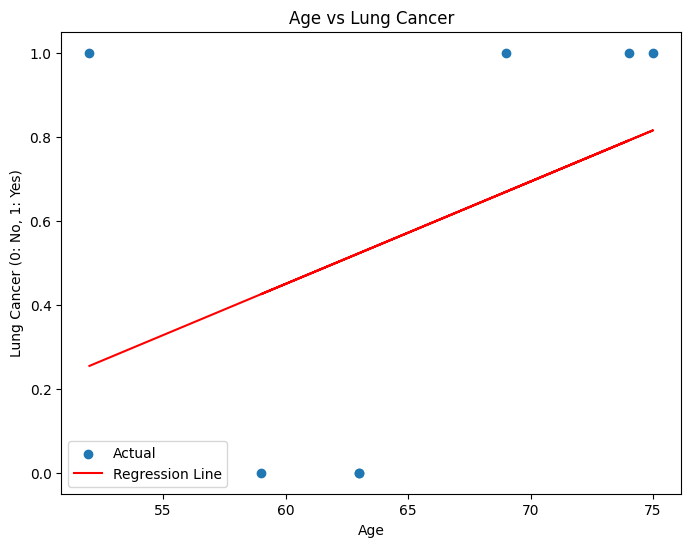

In [7]:
#predikcija za samo jednu promenljivu age
# Koristimo samo jednu kolonu za predikciju
X = df[['AGE']]

# Ponovo instanciramo model
regression = LinearRegression()

# Ponovo fitujemo model
regression.fit(X, y)

# Predviđanja
y_pred = regression.predict(X)

# Plot
plt.figure(figsize=(8, 6))#Ova postavka označava da će figura biti široka 8 inča i visoka 6 inča.

# Scatter plot
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Lung Cancer (0: No, 1: Yes)')
plt.title('Age vs Lung Cancer')

plt.legend()
plt.show()
